## Phase 5 Project

* <b>Name:</b> James Benedito
* <b>Pace:</b> Part-Time 
* <b>Instructor:</b> Morgan Jones

## Project Summary

## Business Understanding

Breast cancer is a prevalent disease that affects a plethora of people, mainly women, worldwide. It accounts for 12.5% of all new cancer cases, deeming it the most common cancer in the world. In the United States, around 30% of all new cancer cases diagnosed in women are breast cancer. 1 in 8 U.S. women are expected to develop breast cancer some time in their life. Currently, more than 4 million U.S. women have a history of breast cancer. It is estimated that approximately 300,000 more women in the United States will be diagnosed with breast cancer in 2023 (https://www.breastcancer.org/facts-statistics). 

Given the statistics, it is obvious why accurate screenings are important. The sooner a doctor is able to catch breast cancer in a patient’s imaging, the more likely they can get lifesaving treatment before their disease progresses. My main stakeholders for this project are gynecologists and other medical professionals who are in charge of examining X-rays of tumors. I want them to know the top characteristics to look out for when determining whether a tumor is cancerous or not.

## Goal

For this project, my goal is to use a numeric dataset to create a classifier. My optimal classification model will deem the most important cellular characteristics that determine whether a tumor is diagnosed as malignant (cancerous) or benign (non-cancerous).   

# Part 1: Numeric Classification

## Dataset 

The numeric dataset I will be using is called <b>breast-cancer.csv</b>, which was downloaded from Kaggle. This dataset was taken from the UC Irvine Machine Learning Repository and houses information from the Diagnostic Wisconsin Breast Cancer Database. Each row represents a cell in a tumor. Each column is a different cellular characteristic, such as mean radius and mean concavity, which was calculated from a fine needle aspirate (FNA) biopsy image of a breast mass. The target variable is the <b>diagnosis</b> column, which has an 'M' to denote 'malignant' and a 'B' to signify 'benign'.  

## Data Exploration

I will start by exploring the <b>breast-cancer.csv</b> file using the <b>.head()</b>, <b>.info()</b>, and <b>.describe()</b> methods. 

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report 

In [2]:
# reading breast cancer data with pandas
breast_cancer_data = pd.read_csv('breast-cancer.csv', index_col=0)
breast_cancer_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [4]:
breast_cancer_data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


From our initial exploration, we see that this dataset has <b>about 600 rows</b> and <b>around 30 columns</b>. Most of the columns house numeric data, except for the <b>diagnosis</b> column, which is our binary target variable.

## Data Preparation and Cleaning

Following our initial exploration of the dataset, let's take a look at things we may need to address prior to modeling. One consideration is possible <b>class imbalance</b> and <b>handling null values</b>. I will preview possible class imbalance by employing the <b>.value_counts()</b> method and use the <b>.isnull().sum()</b> method to determine whether there are any missing values that need to be taken care of.

In [5]:
# checking for null values
breast_cancer_data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# previewing possible class imbalance
breast_cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:>

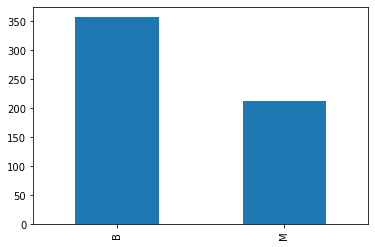

In [7]:
# graphing value_counts
breast_cancer_data.diagnosis.value_counts().plot(kind='bar')

From <b>.isnull().sum()</b>, we see that there are <b>no null values</b> that need to be handled. From <b>.value_counts()</b>, we see that there is some slight class imbalance within the dataset. A 'B' indicates a 'benign' tumor while an 'M' signifies 'malignancy'. Based on the values for each binary indicator, we see that the data is split almost 60-40 with about 60% of the tumors being classified as benign and around 40% of the tumors in the dataset being diagnosed as malignant. Because the minority class makes up <b>more than 10%</b> of the dataset, I will consider there to be no class imbalance problem that needs to be addressed. While there are no null values and class imbalance, one thing that still must be done is changing the letters in the categorical <b>diagnosis</b> column. I will use the <b>.replace()</b> method to change 'B' to an integer of '0' and 'M' to an integer of '1'. I will employ <b>.value_counts()</b> to confirm that the replacement was successful. 

In [8]:
# converting ['B', 'M'] of diagnosis column to ['0', '1']
breast_cancer_data['diagnosis'].replace(['B', 'M'], [0, 1], inplace=True)
breast_cancer_data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Now, we can begin the iterative modeling process.

## Iterative Modeling

During my iterative modeling process, I plan to create a series of classifiers. I will generate several <b>single decision trees</b> and <b>random forests</b> to see which model type yields the best metrics. From there, I will make my final decision on the best overall classifier for the data. 

To begin, we need to specify the target variable and predictors. Then, we need to employ <b>train_test_split()</b> to split the <b>breast_cancer_data</b> into training and test sets. We will set <b>random_state=10</b> for reproducibility and do an <b>80/20</b> split.

In [9]:
# set target variable and predictors
X = breast_cancer_data.drop('diagnosis', axis=1)
y = breast_cancer_data['diagnosis']

# perform 80-20 train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

To be safe, we'll check for possible class imbalance again within the training and test sets.

In [10]:
# checking for class imbalance in training and test set
print(y_train.value_counts())
print(y_test.value_counts())

0    282
1    173
Name: diagnosis, dtype: int64
0    75
1    39
Name: diagnosis, dtype: int64


From <b>.value_counts()</b>, we see that class imbalance isn't a problem for both the training and test sets. In <b>y_train</b>, the split is about 60-40 for 'benign' and 'malignant', similar to the original dataset prior to the train-test split. For <b>y_test</b>, the split is around 65-35 for 'benign' and 'malignant', so there is also no dire class imbalance issue that needs to be considered.

## Model 1a: Baseline Decision Tree

For my first classifier, I will make a <b>decision tree</b>. I will start with a <b>baseline decision tree</b> that has default parameters (with the exception of <b>random_state=10</b> for reproducibility). Once the classifier is trained on the training data and used to predict the test data, I will evaluate its performance using <b>accuracy_score</b> and <b>AUC</b> metrics. I will also generate a <b>confusion matrix</b> to get an understanding of the correctly predicted values versus any type 1 and type 2 errors that may arise. 

In [11]:
# train baseline decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10
dtree_baseline = DecisionTreeClassifier(random_state=10)

# fit classifier to training data
dtree_baseline.fit(X_train, y_train)

# predict test data
pred = dtree_baseline.predict(X_test) 

In [12]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Baseline Decision Tree Classifier: 85.96%

AUC is: 0.87


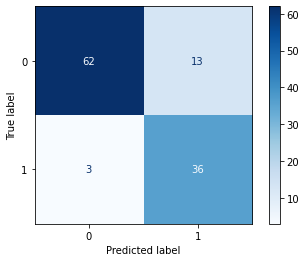

In [13]:
# generate confusion matrix
cnf_matrix = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_baseline.classes_)
disp.plot(cmap=plt.cm.Blues);

For the <b>baseline decision tree</b>, the performance metrics are decent. The testing <b>accuracy</b> is <b>about 86%</b> and the <b>AUC</b> is <b>0.87</b>. With AUC ranging between 0.0-1.0, a value of 0.5 means a model is worthless; an AUC of 0.87 lies a great deal above this threshold. 

From the <b>confusion matrix</b>, we see that the classifier has some Type 1 and Type 2 errors, being 13 and 3, respectively, out of a test sample size of 114. It picks up true negatives (actually benign) and true positives (actually malignant) well. 

Considering the context of our business problem, <b>the model's ability to detect true positives (malignancy) is more important</b> because these represent <b>patients who have breast cancer</b>. Our goal should be <b>reducing the Type 2 error rate</b> as much as possible because these are errors where someone was <b>predicted to have a benign tumor that was actually malignant (cancerous)</b>. However, <b>bringing down the Type 1 error rate</b> is also important because we don't want to give patients a cancer scare who don't really have the disease. Comparing both error types, Type 2 errors can be more fatal; if a patient is deemed as having a non-cancerous tumor when it's actually cancerous, this will prevent them from getting potentially life-saving treatment right away. Therefore, while both error types are bad, if we had to choose, keeping the Type 2 error rate low should be our top priority.

In addition to looking at <b>test data accuracy</b>, we should also look at <b>training data accuracy</b> to see indications of potential <b>overfitting</b> or <b>underfitting</b>. We can achieve this by using the <b>.score()</b> method.

In [14]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_baseline.score(X_train, y_train))
print('Testing Score: ', dtree_baseline.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.8596491228070176


From <b>.score()</b>, we see that the <b>training data</b> has an <b>accuracy of 100%</b>. Because the accuracy scores for the training and test data are highly different, this is indicative of an <b>overfitting</b> issue.

## Model 1b: Hypertuned Decision Tree

Let's create another version of the decision tree classifier called <b>dtree_tuned</b>. Instead of using the default parameters like the baseline, we can do some tree "pruning" and see if it improves the model's performance. By comparing the training and test scores earlier, we saw that the baseline decision tree did better accuracy-wise on the training data as compared to the test data, thus indicating possible overfitting. One way to reduce this overfitting issue is to adjust <b>max_depth</b>. I will determine the optimal max_depth for the training and test data by graphing various depth values against their AUC score.

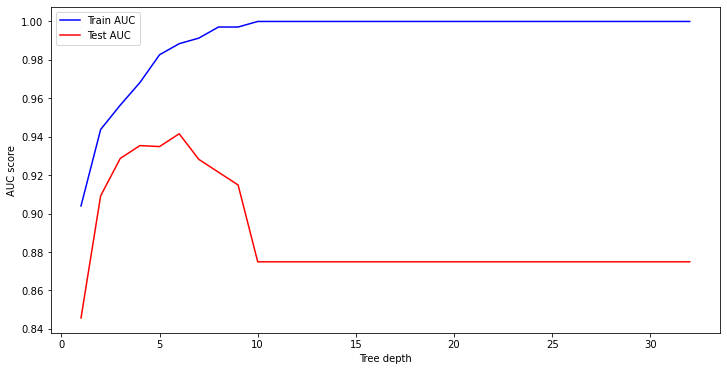

In [15]:
# identify optimal max_depth
max_depths = list(range(1, 33))
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=10)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'b', label='Train AUC')
plt.plot(max_depths, test_results, 'r', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.legend()
plt.show()

From the graph, we see that the training data and test data don't have a particular max_depth value where their AUC scores align. However, the test data AUC is the highest at a max_depth around 7. Let's recreate our decision tree with a specified <b>max_depth=7</b> and see what happens.

In [16]:
# train hypertuned decision tree classifier, then use it to predict test data

# instantiate DecisionTreeClassifier with random_state=10 and max_depth=7
dtree_tuned = DecisionTreeClassifier(random_state=10, max_depth=7)

# fit classifier to training data
dtree_tuned.fit(X_train, y_train)

# predict test data
pred_tuned = dtree_tuned.predict(X_test) 

In [17]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_tuned) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred_tuned)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Decision Tree Classifier: 92.98%

AUC is: 0.93


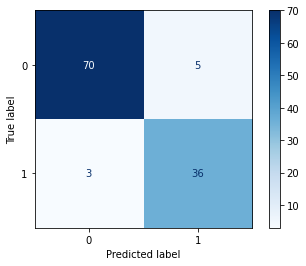

In [18]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, pred_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=dtree_tuned.classes_)
disp.plot(cmap=plt.cm.Blues);

In [19]:
# compare accuracy for training and test data using .score()
print('Training Score: ', dtree_tuned.score(X_train, y_train))
print('Testing Score: ', dtree_tuned.score(X_test, y_test))

Training Score:  0.9934065934065934
Testing Score:  0.9298245614035088


Based on our evaluation metrics, the <b>hypertuned decision tree</b> is an improvement from the <b>baseline decision tree</b>. The <b>accuracy</b> for <b>dtree_tuned</b> is <b>about 93%</b>, which is <b>an 8% increase</b> from <b>dtree_baseline</b>. The <b>AUC</b> also shows <b>an increase from 0.87 to 0.93</b>. 

From the <b>confusion matrix</b>, we see an <b>improvement in the Type 1 error rate</b>. The <b>number of false positives has decreased from 13 to 5</b> when comparing <b>dtree_baseline</b> and <b>dtree_tuned</b>. In terms of the <b>Type 2 error rate</b>, it is the <b>same</b>, with the <b>number of false negatives still being 3</b>. One other thing to notice is that the <b>gap between the training and test scores has decreased</b> for the hypertuned decision tree model, meaning the overfitting issue seen with <b>dtree_baseline</b> is not as apparent with <b>dtree_tuned</b>.

## Model 2a: Random Forest

For my second classifier type, I will create a <b>random forest</b>. This will be more complex than the single decision trees generated previously because this is an ensemble method. To start, I will make a vanilla random forest with default parameters (besides <b>random_state=10</b> for reproducibility). 

In [20]:
# creating baseline random forest classifer

# instantiate RandomForestClassifier with random_state=10 for reproducibility
forest_baseline = RandomForestClassifier(random_state=10)

# fit training data
forest_baseline.fit(X_train, y_train)

# predict test data
forest_baseline_preds = forest_baseline.predict(X_test)

In [21]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, forest_baseline_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_baseline_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Random Forest Classifier: 98.25%

AUC is: 0.99


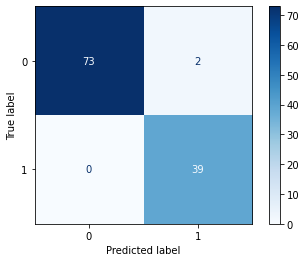

In [22]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, forest_baseline_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_baseline.classes_)
disp.plot(cmap=plt.cm.Blues);

For <b>forest_baseline</b>, the testing <b>accuracy</b> is <b>about 98%</b> and the <b>AUC</b> is <b>0.99</b>. From the confusion matrix, we see that there are <b>only 2 false positives</b> and <b>no false negatives</b>. The <b>low rates for both Type 1 and Type 2 errors</b> is encouraging. With this model, <b>all patients that have malignant tumors would be successfully diagnosed</b>. Compared to <b>dtree_baseline</b> and <b>dtree_tuned</b>, <b>forest_baseline</b> is by far our best model based on our chosen evaluation metrics. 

Let's use the <b>.score()</b> method to compare the training and test accuracies of the <b>forest_baseline</b> classifier.

In [23]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_baseline.score(X_train, y_train))
print('Testing Score: ', forest_baseline.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9824561403508771


Comparing the training and test scores, we see <b>no evidence of overfitting</b>. For both the training and test data, the <b>forest_baseline</b> classifier has similar accuracy metrics. 

## Model 2b: Hypertuned Random Forest 

While <b>forest_baseline</b> had strong accuracy, let's see if we can improve it any further by tuning some hyperparameters. To figure out the optimal parameters, we can use the <b>GridSearchCV</b> tool from <b>sklearn.model_selection</b>. The main parameters I will focus on are <b>n_estimators</b> and <b>max_depth</b>. Once <b>GridSearchCV</b> returns its suggestions, I will generate <b>forest_tuned</b> and evaluate its performance using the same accuracy metrics.

To start, I will generate a parameter grid called <b>param_grid</b>. 

In [24]:
# generate param_grid
forest_param_grid = {
    "n_estimators": [10, 30, 100],
    "max_depth": [None, 2, 6, 10],
}

In [25]:
# use GridSearchCV to find optimal parameters
rf_grid_search = GridSearchCV(forest_baseline, forest_param_grid, cv=3) # cv=3 for 3-fold cross validation
rf_grid_search.fit(X_train, y_train)

print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Optimal Parameters: {'max_depth': None, 'n_estimators': 100}


In [26]:
# instantiate RandomForestClassifier with hypertuned parameters (based on GridSearchCV results)
forest_tuned = RandomForestClassifier(random_state=10, 
                                      max_depth=None,
                                      n_estimators=100)

# fit training data
forest_tuned.fit(X_train, y_train)

# predict test data
forest_tuned_preds = forest_tuned.predict(X_test)

In [27]:
# calculate accuracy_score and AUC for test data to evaluate classifier performance

# print accuracy_score
print("Testing Accuracy for Hypertuned Random Forest: {:.4}%".format(accuracy_score(y_test, forest_tuned_preds) * 100))

# check AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, forest_tuned_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is: {0}'.format(round(roc_auc, 2)))

Testing Accuracy for Hypertuned Random Forest: 98.25%

AUC is: 0.99


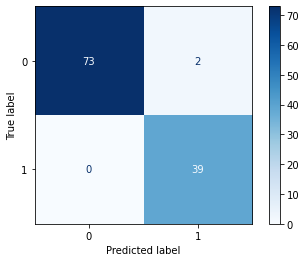

In [28]:
# generate confusion matrix

cnf_matrix = confusion_matrix(y_test, forest_tuned_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=forest_tuned.classes_)
disp.plot(cmap=plt.cm.Blues);

In [29]:
# compare accuracy for training and test data using .score()
print('Training Score: ', forest_tuned.score(X_train, y_train))
print('Testing Score: ', forest_tuned.score(X_test, y_test))

Training Score:  1.0
Testing Score:  0.9824561403508771


The <b>forest_tuned</b> classifier has the <b>exact same accuracy results</b> as <b>forest_baseline</b>. This makes sense because the <b>GridSearchCV</b> results yielded <b>max_depth=None</b> and <b>n_estimators=100</b> as the optimal values for these two parameters, which is exactly what the default parameters are. Essentially, <b>there is no difference<b> between <b>forest_tuned</b> and <b>forest_baseline</b>. They are identical models.

## Best Model

Out of the 4 models we generated, let's choose the best one. We will start by revisiting their testing accuracies. Recall that <b>forest_baseline</b> and <b>forest_tuned</b> were identical classifiers because the optimal parameters yielded from <b>GridSearchCV</b> ended up being the default parameters. Therefore, to avoid repetition, we will just use <b>forest_baseline</b>. 

In [30]:
# comparing testing accuracy for dtree_baseline, dtree_tuned, forest_baseline
# forest_baseline and forest_tuned were identical models

# decision trees
print("Testing Accuracy for Baseline Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))
print("Testing Accuracy for Hypertuned Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred_tuned) * 100))

# random forest model
print("Testing Accuracy for Random Forest Classifier: {:.4}%".format(accuracy_score(y_test, forest_baseline_preds) * 100))

Testing Accuracy for Baseline Decision Tree Classifier: 85.96%
Testing Accuracy for Hypertuned Decision Tree Classifier: 92.98%
Testing Accuracy for Random Forest Classifier: 98.25%


We see that the highest testing accuracy was for the random forest classifier. We will proceed with <b>forest_baseline</b> and choose it as our <b>final model</b>. 

## Final Model

As we have seen, the <b>accuracy</b> of our final model, <b>forest_baseline</b>, is <b>about 98%</b> and the <b>AUC</b> is <b>0.99</b>. Let's look at some other evaluation metrics using <b>classification_report</b>. 

In [31]:
# print classification report for final model, forest_baseline
print(classification_report(y_test, forest_baseline_preds))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



From the classification report, we see that the metrics were similar for both classes (benign and malignant tumors) across the board. 

The <b>precision</b>, which is a measure of true positives versus the total number of predicted positives, was <b>100% for benign tumors</b> and <b>95% for malignant tumors</b>. 

<b>Recall</b>, which is a measure of positives that were correctly identified, was <b>97% for the benign</b> class and <b>100% for the malignant</b> class. 

Lastly, the <b>f1_score</b>, which takes both precision and recall into account and is the percent of positive predictions that were correct, was <b>99% for benign</b> and <b>97% for malignant</b> tumors. 

Because the precision, recall, and f1_score metrics were similar values for both benign and malignant tumors, this is further proof that <b>class imbalance was not an issue</b>. On top of that, the <b>accuracy</b> of the chosen model was <b>98%</b> on the test data. More importantly, there were <b>no Type 2 errors (false negatives)</b>. This was of utmost importance because patients with breast cancer need to be properly diagnosed. All in all, the <b>forest_baseline</b> classifier is strong in many evaluation areas.

For our final model, let's go ahead and plot the <b>most important features</b>. From here, we can craft our suggestions for the stakeholder.

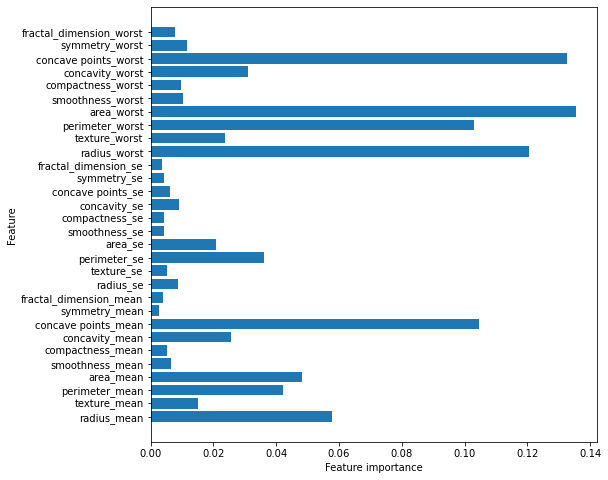

In [32]:
# create function for plotting most important features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# plot most important features for forest_baseline classifier
plot_feature_importances(forest_baseline)

From the bar graph, we see that the three most important features in our classifer are <b>area_worst</b>, <b>concave points_worst</b>, and <b>radius_worst</b>. 
* The <b>area_worst</b> column represents a cell's worst area 
* The <b>concave points_worst</b> column represents a cell's greatest number of concave points. The larger the quantity of concave points, the more likely a cell is to be malignant.   
* The <b>radius_worst</b> column represents a cell's worst radius

Let's create visuals for each of these features to get a better understanding of how they compare for benign and malignant cells. 

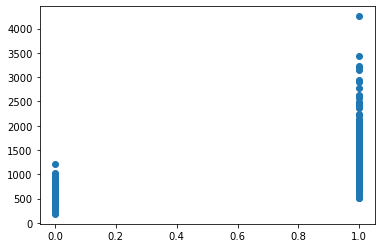

In [33]:
# scatterplot for area_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['area_worst'])
plt.show()

In [34]:
# comparing area_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['area_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0     558.899440
1    1422.286321
Name: area_worst, dtype: float64

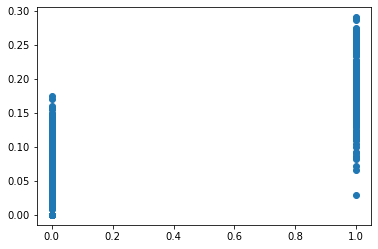

In [35]:
# scatterplot for concave points_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['concave points_worst'])
plt.show()

In [36]:
# comparing concave points_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['concave points_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0    0.074444
1    0.182237
Name: concave points_worst, dtype: float64

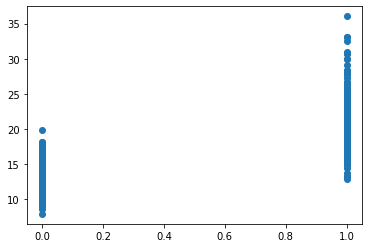

In [37]:
# scatterplot for radius_worst
# 0 is for 'B' and 1 is for 'M'
plt.scatter(x=breast_cancer_data['diagnosis'], y=breast_cancer_data['radius_worst'])
plt.show()

In [38]:
# comparing radius_worst means between diagnosis categories
# 0 is for 'B' and 1 is for 'M'
breast_cancer_data['radius_worst'].groupby(breast_cancer_data['diagnosis']).mean()

diagnosis
0    13.379801
1    21.134811
Name: radius_worst, dtype: float64

For the <b>area_worst</b> scatterplot, 

For the <b>concave points_worst</b> scatterplot, 

For the <b>radius_worst</b> scatterplot, 

# Part 2: Image Classification

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/micha/Documents/Flatiron__/course_materials/phase_5/Breast-Cancer-Classification\\benign'

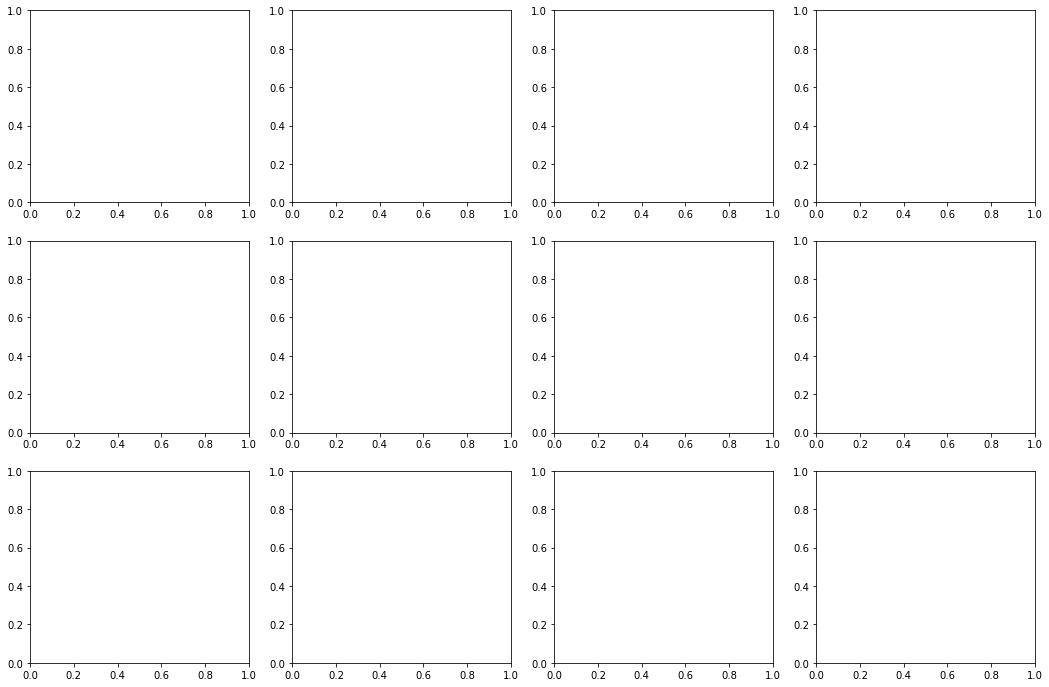

In [39]:
import os

# Define the labels and corresponding directories
labels = ['benign', 'malignant', 'normal']
data_dir = '/micha/Documents/Flatiron__/course_materials/phase_5/Breast-Cancer-Classification'

# Create a figure to display the images
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Desired width and height for each image
desired_width = 300  # Adjust as needed
desired_height = 300  # Adjust as needed

for i, label in enumerate(labels):
    label_dir = os.path.join(data_dir, label)
    
    # Get a list of image files
    image_files = [file for file in os.listdir(label_dir) if file.endswith('.png')]
    
    # Sort the list of image files
    image_files = sorted(image_files)
    
    # Loop through the first 4 image files
    for j in range(4):
        if j < len(image_files):
            # Load and resize the image
            image_path = os.path.join(label_dir, image_files[j])
            image = Image.open(image_path)
            image = image.resize((desired_width, desired_height), Image.ANTIALIAS)
            
            # Determine the label based on whether it's an image or a mask
            if j % 2 == 0:
                image_label = f'{label} - Image {j // 2 + 1}'
            else:
                image_label = f'{label} - Image {j // 2 + 1} Mask'
            
            # Display the image with the corresponding label
            axs[i, j].imshow(image)
            axs[i, j].set_title(image_label)
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()

In [40]:
benign_directory = '/micha/Documents/course_materials/phase_5/Breast-Cancer-Classification/benign'
malignant_directory = '/micha/Documents/course_materials/phase_5/Breast-Cancer-Classification/malignant'

In [41]:
base_dir = 'chest_xray/reduced size/'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

train_NORMAL_dir = os.path.join(train_dir, 'NORMAL')
train_PNEUMONIA_dir = os.path.join(train_dir, 'PNEUMONIA')

validation_NORMAL_dir = os.path.join(validation_dir, 'NORMAL')
validation_PNEUMONIA_dir = os.path.join(validation_dir, 'PNEUMONIA')

train_NORMAL_fnames = os.listdir( train_NORMAL_dir )
train_PNEUMONIA_fnames = os.listdir( train_PNEUMONIA_dir )

print(train_NORMAL_fnames[:10])
print(train_PNEUMONIA_fnames[:10])

print('total training NORMAL images :', len(os.listdir(      train_NORMAL_dir ) ))
print('total training PNEUMONIA images :', len(os.listdir(      train_PNEUMONIA_dir ) ))

print('total validation NORMAL images :', len(os.listdir( validation_NORMAL_dir ) ))
print('total validation PNEUMONIA images :', len(os.listdir( validation_PNEUMONIA_dir ) ))

C:\Users\micha\anaconda3\envs\learn-env\lib\site-packages\tensorflow\python\framework\dtypes.py:513: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  np.object,


AttributeError: module 'numpy' has no attribute 'object'.
`np.object` was a deprecated alias for the builtin `object`. To avoid this error in existing code, use `object` by itself. Doing this will not modify any behavior and is safe. 
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

## Conclusions

To summarize: the final model that we selected was <b>forest_baseline</b>. This model had an <b>accuracy</b> of <b>about 98%</b> and an <b>AUC</b> of <b>0.99</b>. The <b>most important features</b> according to this classifier were: <b>area_worst</b>, <b>concave points_worst</b>, and <b>radius_worst</b>.  
 
Based on the classifier, my suggestions are:

## Limitations and Future Improvements

The classifier for the numeric data had strong accuracy. It was able to correctly identify all malignant cells in the test set, which was the most important thing to detect. One limitation of the classifier, however, is the timeliness of the data used to create it; the dataset was from 1995. Considering that it is currently 2023, almost 30 years have gone by, so perhaps a more recent dataset could have been fed into this model to ensure its modern-day relevance. 